<a href="https://colab.research.google.com/github/ThanaritKanjanametawatAU/AutoKerasProject/blob/main/AutoKarasProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Milestone 1 of **Basic Deep Learning Techniques for Image Classification**


Topic: Multi-layer Perceptron for image classification

Author: Xiaotian Han

In this milestone, you will implement the multi-layer preceptron for image classification. The step is listed as follows:

1. Load cifar10 dataset
2. Explore data
3. Prepare the dataset
4. Build the MLP model
5. Explore the trained model
6. Build and train the CNN model

Intructions:
1. Upload this notebook to the google colab and
2. Set the runtime to GPU (Runtime -> Change runtime type -> GPU )
2. Run the first cell to install the package
2. You should complete the code between # Your code here
3. The output of the cell is the expected output of the code

# 0. Setting Up Environment

## 0.1 Install Python3.8, Tensorflow and AutoKeras

In [1]:
!python --version

Python 3.10.12


In [2]:
!apt-get update -y
!apt-get install python3.8 python3.8-distutils
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!update-alternatives --config python3
!apt-get install python3-pip
!python3 -m pip install --upgrade pip --user

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.4 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,922 kB]
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,187 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.

In [3]:
%pip install tensorflow==2.5.0
%pip install matplotlib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorboard to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 108.1 MB/s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.9 MB/s eta 0:00:00
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 98.6 MB/s eta 0:00:00
Using cached packaging-24.1-py3-none-any.whl (53 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's depen

In [4]:
%pip install AutoKeras==1.0.16
%pip install keras-tuner==1.0.3

  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl.metadata (2.0 kB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.9/166.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 21.1 MB/s eta 0:00:00
Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 22.0 MB/s eta 0:0

In [5]:
!python --version
%pip list

Python 3.8.19
Package                 Version
----------------------- -------------------
absl-py                 0.15.0
asttokens               2.4.1
astunparse              1.6.3
autokeras               1.0.16
backcall                0.2.0
blinker                 1.4
cachetools              5.3.3
certifi                 2024.6.2
charset-normalizer      3.3.2
contourpy               1.1.1
cycler                  0.12.1
dbus-python             1.2.18
decorator               5.1.1
distro                  1.7.0
executing               2.0.1
flatbuffers             1.12
fonttools               4.53.0
gast                    0.4.0
google-auth             2.30.0
google-auth-oauthlib    0.4.6
google-pasta            0.2.0
grpcio                  1.34.1
h5py                    3.1.0
idna                    3.7
importlib_metadata      7.1.0
importlib_resources     6.4.0
ipython                 8.12.3
jedi                    0.19.1
jeepney                 0.7.1
joblib                  1.4.2
ker

## 0.2 Import Libraries

In [81]:
# import the python packages
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Layer, Dense, ReLU, Softmax, MaxPooling2D, Flatten, Conv2D

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import classification_report

print( "tf.__version__:", tf.__version__ )

tf.__version__: 2.15.0


# 1. Dataset

## 1.1 Load Dataset

In [68]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


## 1.2 Explore Dataset

(-0.5, 31.5, 31.5, -0.5)

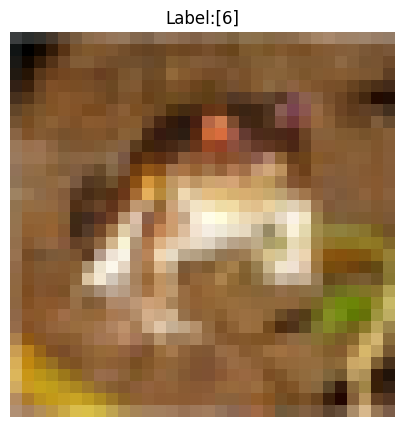

In [69]:
image = x_train[0]
label = y_train[0]

# Plot the original image
plt.figure( figsize=(5,5) )
plt.tight_layout()
plt.imshow(x_train[0].reshape(32,32,3), interpolation='none')
plt.title("Label:{}".format(y_train[0]))
plt.axis('off')

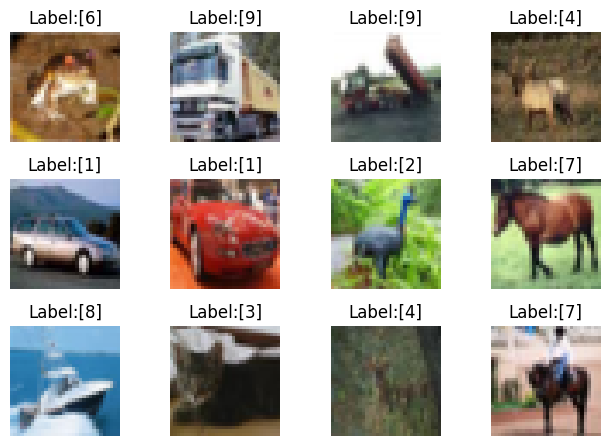

In [70]:
# plot first 12 images
num_images = 12
images = x_train[:num_images]
labels = y_train[:num_images]

# Plot the original image
for i in range(num_images):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(images[i].reshape(32,32,3), interpolation='none')
    plt.title("Label:{}".format(labels[i]))
    plt.axis('off')

In [71]:
# unique label
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
# An Image representation Sample
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [73]:
# X Train Value Type
print(type(x_train[0][0][0][0]))

<class 'numpy.uint8'>


## 1.3 Dataset Preparation

In [74]:
# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [75]:
# X Train Value Type
print(type(x_train[0][0][0][0]))

<class 'numpy.float32'>


In [77]:
# Reshape Data
x_trainMLP = x_train.reshape(-1, 32*32*3)
x_testMLP = x_test.reshape(-1, 32*32*3)

x_trainCNN = x_train.reshape(-1, 32, 32, 3)
x_testCNN = x_test.reshape(-1, 32, 32, 3)

# 2. Building and Evaluating MLP Model

## 2.1 Defining MLP Model

In [78]:
inputs = tf.keras.Input(shape=(32*32*3, ))
MLPhidden1 = tf.keras.layers.Dense(1024, activation="relu")(inputs)
MLPhidden2 = tf.keras.layers.Dense(256, activation="relu")(MLPhidden1)
outputs = tf.keras.layers.Dense(10, activation="softmax")(MLPhidden2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_34 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_35 (Dense)            (None, 256)               262400    
                                                                 
 dense_36 (Dense)            (None, 10)                2570      
                                                                 
Total params: 3411722 (13.01 MB)
Trainable params: 3411722 (13.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2.2 Training MLP Model

In [82]:
# Train
history = model.fit(x_trainMLP, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
2500/2500 [==============================] - 9s 4ms/step - loss: 1.3192 - accuracy: 0.5315 - val_loss: 1.4655 - val_accuracy: 0.4820
Epoch 2/20
2500/2500 [==============================] - 12s 5ms/step - loss: 1.2869 - accuracy: 0.5432 - val_loss: 1.4240 - val_accuracy: 0.5068
Epoch 3/20
2500/2500 [==============================] - 12s 5ms/step - loss: 1.2560 - accuracy: 0.5525 - val_loss: 1.4179 - val_accuracy: 0.5065
Epoch 4/20
2500/2500 [==============================] - 11s 4ms/step - loss: 1.2279 - accuracy: 0.5633 - val_loss: 1.4153 - val_accuracy: 0.5104
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 1.1978 - accuracy: 0.5773 - val_loss: 1.4347 - val_accuracy: 0.4990
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 1.1720 - accuracy: 0.5856 - val_loss: 1.3824 - val_accuracy: 0.5190
Epoch 7/20
2500/2500 [==============================] - 9s 4ms/step - loss: 1.1452 - accuracy: 0.5929 - val_loss: 1.4373 - val_accu

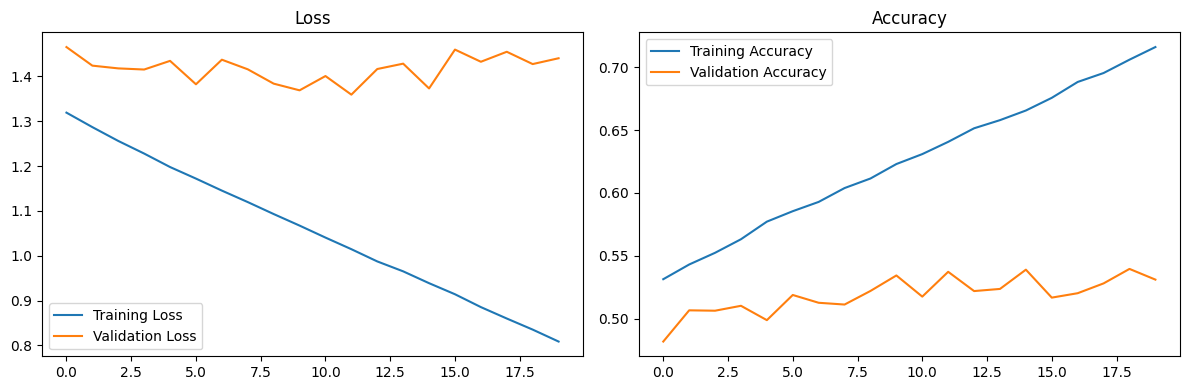

In [83]:
# Overfitting Plot
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.tight_layout()
    plt.show()

plot_loss_accuracy(history)

## 2.3 MLP Model Evaluation

In [84]:
# Evaluate at test set
loss, accuracy = model.evaluate(x_testMLP, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Evaluate Precision, Recall, F1 Measure
y_pred = model.predict(x_testMLP)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))


313/313 [==============================] - 1s 3ms/step - loss: 1.4090 - accuracy: 0.5271
Loss: 1.4090287685394287
Accuracy: 0.5271000266075134
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1000
           1       0.69      0.61      0.64      1000
           2       0.40      0.46      0.43      1000
           3       0.34      0.37      0.36      1000
           4       0.53      0.37      0.44      1000
           5       0.40      0.50      0.44      1000
           6       0.57      0.58      0.58      1000
           7       0.67      0.54      0.60      1000
           8       0.57      0.74      0.64      1000
           9       0.59      0.57      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.54      0.53      0.53     10000



1/1 [==============================] - 0s 17ms/step


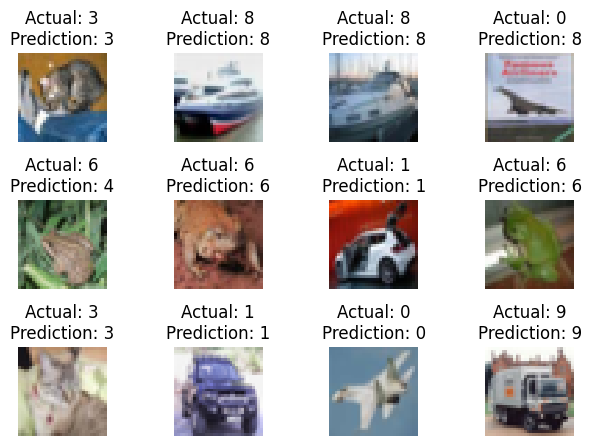

In [85]:
# Plot Some examples with labels
num_images = 12
images = x_testMLP[:num_images]
labels = y_test[:num_images]
predictions = model.predict(images)

for i in range(num_images):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(images[i].reshape(32,32,3), interpolation='none')
    plt.title(f"Actual: {labels[i][0]}\nPrediction: {np.argmax(predictions[i])}")
    plt.axis('off')

# 3. Building CNN Model

## 3.1 Defining CNN Model

In [86]:
inputs = tf.keras.Input(shape=(32, 32, 3))
# 32 is the number of kernels, there are 32 kernels in this 1 layer hoping to capture each features of the image
# There are 896 weights to be trained in this layer
# Ther are has 32 sets kernels, each sets has 3 kernels for each RGB channel,
# and each individual kernel has 3*3 weights, with 1 bias for each set of kernels
# So, 32 * ((3 * 3 * 3) + 1))
CNNhidden1 = Conv2D(32, (3, 3), activation='relu')(inputs)

CNNpooling1 = MaxPooling2D((2, 2))(CNNhidden1)
CNNhidden2 = Conv2D(64, (3, 3), activation='relu')(CNNpooling1)
CNNpooling2 = MaxPooling2D((2, 2))(CNNhidden2)
CNNhidden3 = Conv2D(64, (3, 3), activation='relu')(CNNpooling2)
# CNNpooling3 = MaxPooling2D((2, 2))(CNNhidden3)
toMLP = Flatten()(CNNhidden3)
MLPhidden1 = Dense(64, activation='relu')(toMLP)
outputs = Dense(10, activation='softmax')(MLPhidden1)
CNNmodel = Model(inputs=inputs, outputs=outputs)
CNNmodel.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
CNNmodel.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          369

## 3.2 Training CNN Model

In [87]:
# Training
CNNhistory = CNNmodel.fit(x_trainCNN, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
2500/2500 [==============================] - 16s 5ms/step - loss: 1.9487 - accuracy: 0.2859 - val_loss: 1.6488 - val_accuracy: 0.4059
Epoch 2/20
2500/2500 [==============================] - 11s 5ms/step - loss: 1.5507 - accuracy: 0.4387 - val_loss: 1.4258 - val_accuracy: 0.4880
Epoch 3/20
2500/2500 [==============================] - 11s 5ms/step - loss: 1.3728 - accuracy: 0.5070 - val_loss: 1.3402 - val_accuracy: 0.5236
Epoch 4/20
2500/2500 [==============================] - 11s 5ms/step - loss: 1.2492 - accuracy: 0.5530 - val_loss: 1.2230 - val_accuracy: 0.5636
Epoch 5/20
2500/2500 [==============================] - 12s 5ms/step - loss: 1.1460 - accuracy: 0.5955 - val_loss: 1.1828 - val_accuracy: 0.5814
Epoch 6/20
2500/2500 [==============================] - 12s 5ms/step - loss: 1.0634 - accuracy: 0.6248 - val_loss: 1.0793 - val_accuracy: 0.6194
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.9984 - accuracy: 0.6494 - val_loss: 1.1358 - val_ac

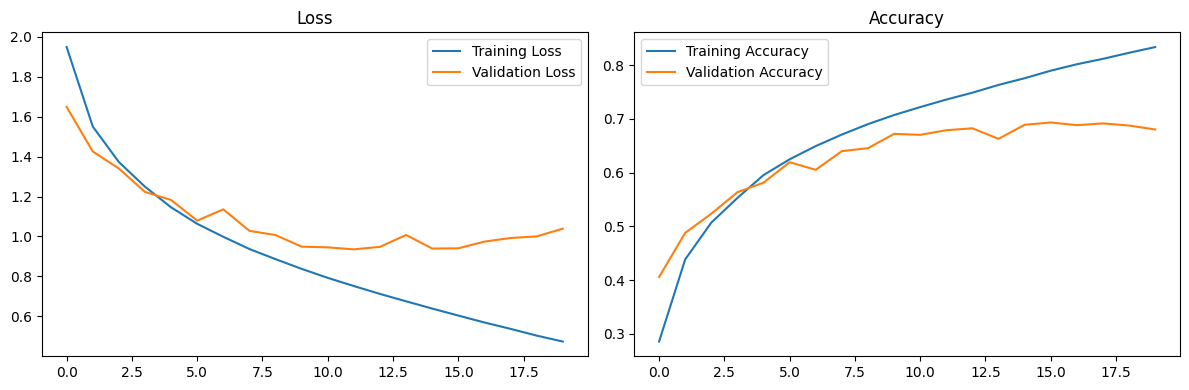

In [88]:
# Overfitting Plot
plot_loss_accuracy(CNNhistory)

## 3.3 CNN Model Evaluation

In [90]:
# Evaluate at test set
loss, accuracy = CNNmodel.evaluate(x_testCNN, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Evaluate Precision, Recall, F1 Measure
y_pred = CNNmodel.predict(x_testCNN)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

313/313 [==============================] - 3s 6ms/step - loss: 1.0412 - accuracy: 0.6818
Loss: 1.0411685705184937
Accuracy: 0.6818000078201294
313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1000
           1       0.86      0.69      0.76      1000
           2       0.49      0.70      0.58      1000
           3       0.54      0.48      0.51      1000
           4       0.65      0.61      0.63      1000
           5       0.60      0.57      0.58      1000
           6       0.85      0.66      0.74      1000
           7       0.69      0.77      0.73      1000
           8       0.76      0.85      0.80      1000
           9       0.73      0.80      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



1/1 [==============================] - 0s 165ms/step


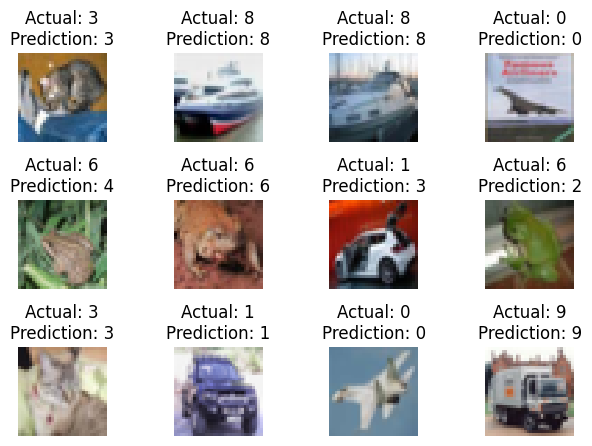

In [92]:
# Plot Some examples with labels
num_images = 12
images = x_testCNN[:num_images]
labels = y_test[:num_images]
predictions = CNNmodel.predict(images)

for i in range(num_images):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(images[i].reshape(32,32,3), interpolation='none')
    plt.title(f"Actual: {labels[i][0]}\nPrediction: {np.argmax(predictions[i])}")
    plt.axis('off')